In [45]:
import numpy as np
from utils import ProgBar

# Declarando constantes

In [57]:
k = 0.0001
phi = 0.2
ksi = 0.0
cb = 0.15
lambd_nb = 1.8
mi_n = 0.2
lambd_bn = 0.1
y_n = 0.1
t_dom = (0,10)

size_tt = int(((t_dom[1] - t_dom[0]) / (k)))

print(
    "Steps in time = {:d}\n".format(
        size_tt,
    )
)


Steps in time = 100000



In [60]:
def fb(Cb, Cn):
    return (cb - lambd_nb * Cn) * Cb


def fn(Cb, Cn, Cn_max):
    return y_n * Cb * (Cn_max - Cn) - lambd_bn * Cn * Cb - mi_n * Cn


def solve_pde():
    size_tt = int(((t_dom[1] - t_dom[0]) / (k)) + 1)

    t = np.linspace(t_dom[0], t_dom[1], num=size_tt - 1)

    Cn_final = np.zeros((size_tt - 1))
    Cb_final = np.zeros((size_tt - 1))

    Cn_new = 0
    Cb_new = 0.2

    bar = ProgBar(size_tt, "Calculando ...")

    for time in range(size_tt - 1):

        Cn_old = Cn_new
        Cb_old = Cb_new

        Cb_new = (k / phi) * (fb(Cb_old, Cn_old)) + Cb_old

        Cn_new = (k / phi) * (fn(Cb_old, Cn_old, 0.55)) + Cn_old

        Cb_final[time] = Cb_new
        Cn_final[time] = Cn_new

        bar.update()

    return t, Cb_final, Cn_final

In [61]:
t,Cb,Cn = solve_pde()

Calculando ...
[-------------------------------------------------] 100.00% - 100000 of 100001

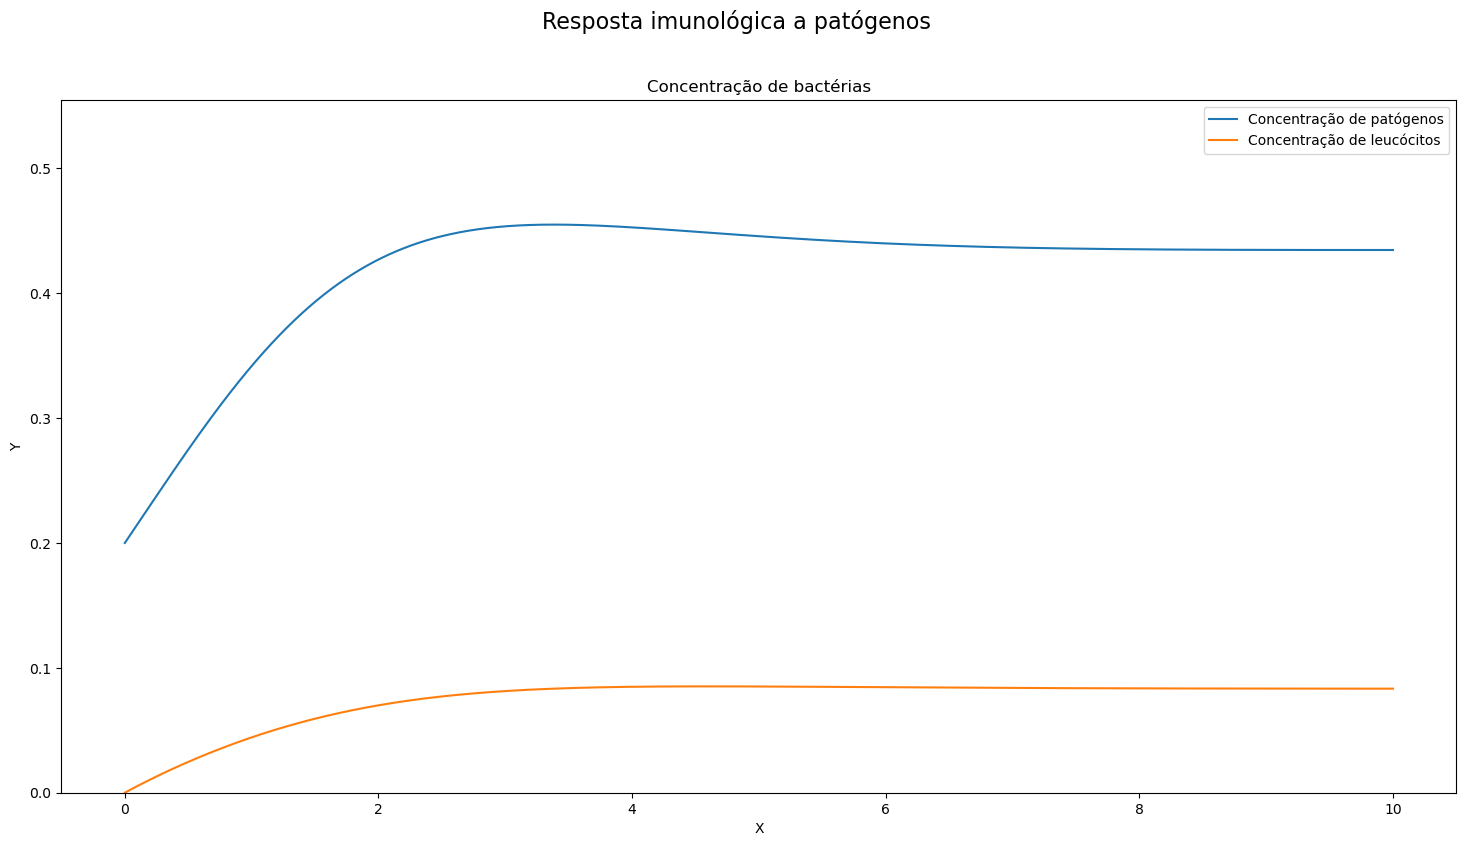

In [64]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cb), np.max(Cn)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(t, Cb, label="Concentração de patógenos")
ax.plot(t, Cn, label="Concentração de leucócitos")
ax.set_title("Concentração de bactérias")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax+0.1)
ax.legend()
plt.show()

In [50]:
np.savetxt("Cb.csv",Cb,delimiter=",")
np.savetxt("Cn.csv",Cn,delimiter=",")
